# MESCAL 307: Country Plotter Utility Module
This notebook demonstrates a simple but useful module to project countries from the country library to a folium map.

## Module Use-Case
There are two primary use-cases for the module:

Using it as a library with geo data for countries.
Using it to project countries that are not the focus of your study (e.g. neighboring countries) in a neutral color to your map.

Whenever you are creating a KPI Map for your study (e.g. a map with European prices or anything alike), you often want to project the countries that are not part of your study itself (e.g. neighboring countries) to the map as well. You can, of course, also use Folium's native tile layers. However, those are often overloaded with unnecessary texts and geo information that distracts from your actual data. The module enables you to include other countries that are not the focus of your study, without distracting from the information you are trying to communicate.

In [1]:
# Setting up Notebook environment (set working directory, add path, ensure submodule inclusion)
# No need to read ;)

def setup_notebook_env():
    """Locate repository root, set working directory, and include submodules."""
    import os
    import sys
    from pathlib import Path

    def find_repo_root():
        current = Path(os.getcwd()).absolute()
        while current != current.parent:
            if (current / '.git').exists() or (current / 'submodules').exists():
                return current
            current = current.parent
        raise FileNotFoundError(f"Could not find repository root starting from {os.getcwd()}.")

    repo_root = find_repo_root()
    os.chdir(repo_root) # Change working directory

    # Add to path
    if str(repo_root) not in sys.path:
        sys.path.insert(0, str(repo_root))
        
    # Ensure all submodules are included in the path
    from vanilla.notebook_config import add_submodules_to_path    
    add_submodules_to_path()
    
    
setup_notebook_env()

In [2]:
import os
import io
import folium
from PIL import Image as PILImage
from IPython.display import Image

from mescal.utils.folium_utils import set_background_color_of_map, MapCountryPlotter
from vanilla.notebook_config import configure_clean_output_for_jupyter_notebook

configure_clean_output_for_jupyter_notebook()

export_folder = 'studies/study_01_intro_to_mescal/non_versioned/output'
os.makedirs(export_folder, exist_ok=True)

## Basic Usage
The MapCountryPlotter class provides a simple interface to add country geometries to folium maps. It handles the loading of GeoJSON data and provides methods to easily add countries to feature groups.

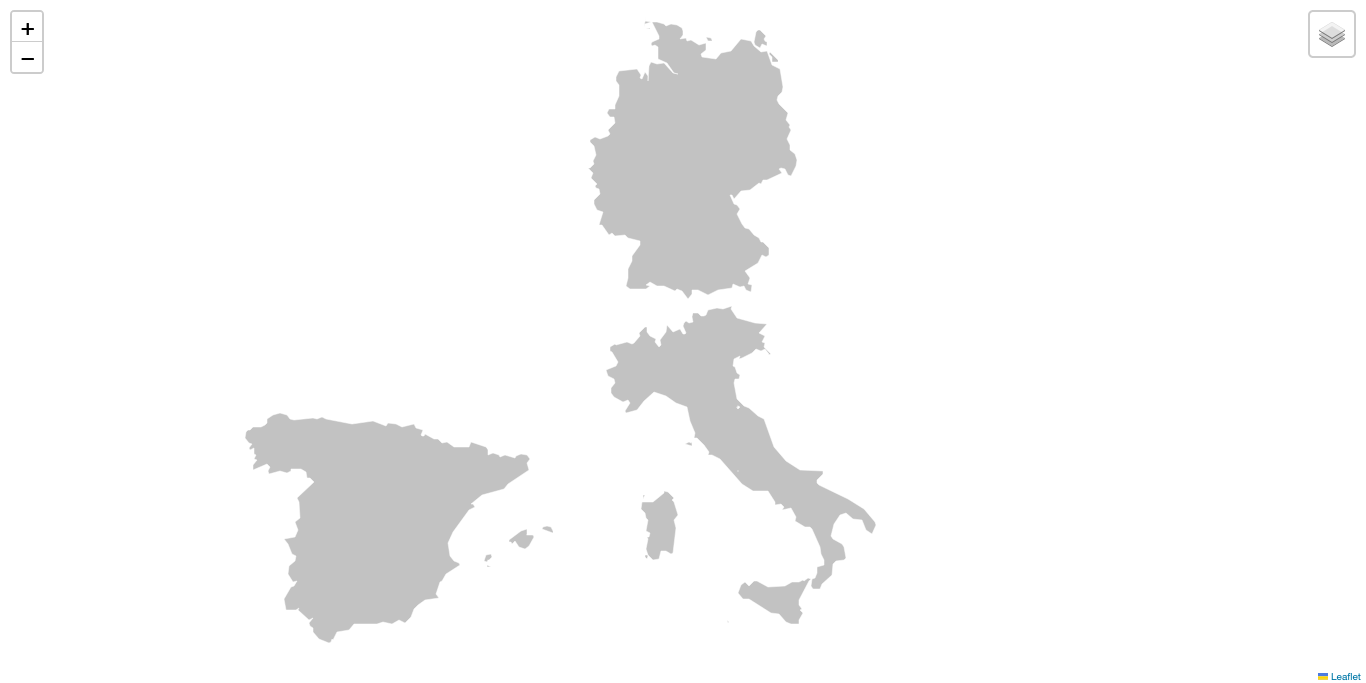

In [3]:
# Create a basic map centered on Europe
m = folium.Map(location=[46, 10], zoom_start=4.75, tiles=None)

# Set a clean white background
m = set_background_color_of_map(m, color='#ffffff')

# Initialize the plotter (uses default geojson)
plotter = MapCountryPlotter()

# Create a feature group for our countries
countries_fg = folium.FeatureGroup(name="Selected Countries")

# Add some countries with default styling
plotter.add_countries_to_feature_group(
    countries_fg,
    countries=["DE", "FR", "IT", "ES"],
)
countries_fg.add_to(m)

# Let's add layer control
folium.LayerControl().add_to(m)

# Save map as static image and display the image inside this notebook
image_path = os.path.join(export_folder, 'basic_country_map.png')
img_data = m._to_png(5)  # 5 second delay to ensure everything renders
img = PILImage.open(io.BytesIO(img_data))
img.save(image_path)
Image(image_path)

# Use this instead when you are running locally and want to view the interactive html inside the notebook
# m

# Use this instead when you want to save the map as an html and want to open it in your browser
# html_file_path = os.path.join(export_folder, 'basic_country_map.html')
# m.save(html_file_path)
# import webbrowser
# from pathlib import Path
# webbrowser.open(Path(html_file_path).resolve().as_uri());

The plotter looks up countries using standard ISO country codes (ISO-A2, ISO-A3, SOV-A3). This is particularly useful when working with data that uses these standard codes.

## Custom Styling
One of the key benefits of using this plotter is the ability to customize the styling of countries. This is useful when you want to highlight specific regions or apply styling based on data values.

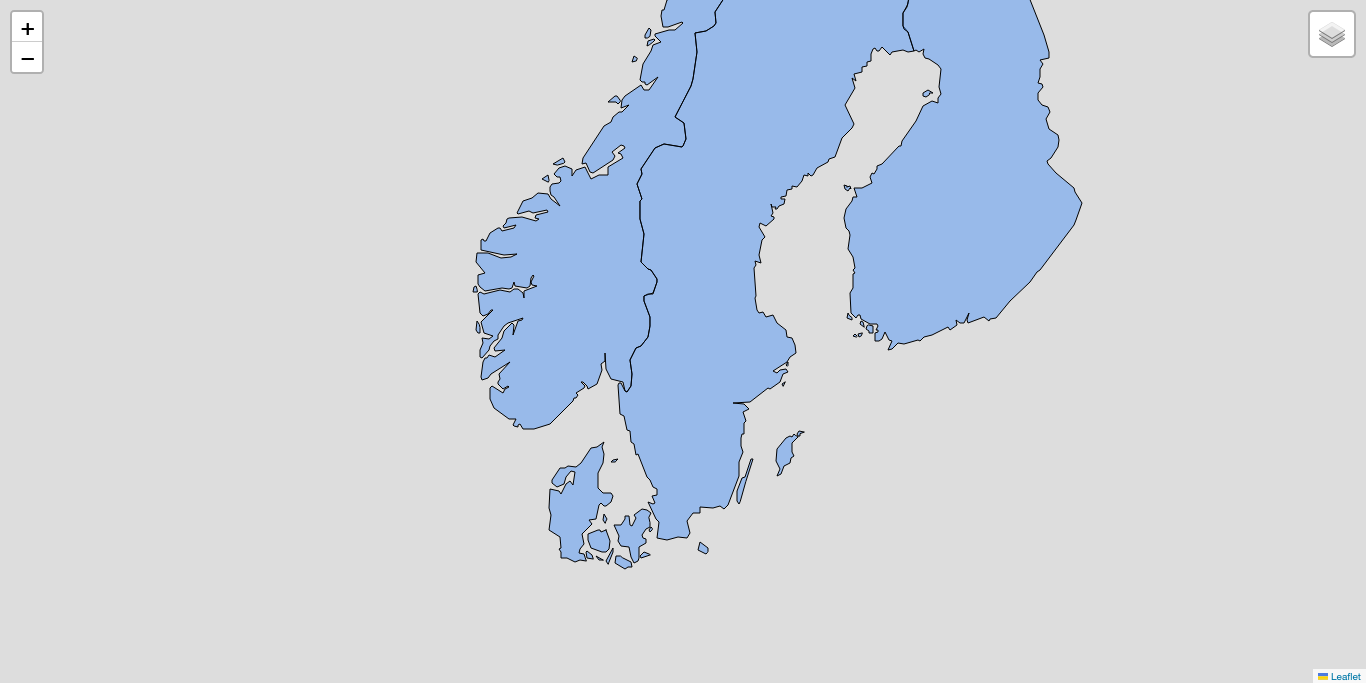

In [4]:
# Create a map
custom_map = folium.Map(location=[60, 14], zoom_start=5, tiles=None)

# Create feature group with custom styling
nordic_fg = folium.FeatureGroup(name="Nordic Countries")

# Add Nordic countries with blue styling
plotter.add_countries_to_feature_group(
    nordic_fg,
    countries=["NOR", "SE", "FI", "DK"],
    style={
        "fillColor": "#3388ff",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.4
    }
)
nordic_fg.add_to(custom_map)

folium.LayerControl().add_to(custom_map)

# Save map as static image and display the image inside this notebook
image_path = os.path.join(export_folder, 'custom_styled_map.png')
img_data = custom_map._to_png(5)
img = PILImage.open(io.BytesIO(img_data))
img.save(image_path)
Image(image_path)

The style dictionary accepts the same parameters as Folium's GeoJSON styling. You can customize:

- `fillColor`: The color to fill the country
- `color`: The border color
- `weight`: The border thickness
- `fillOpacity`: The transparency of the fill color

This flexibility allows you to create visually distinct regions or apply data-driven styling, which is perfect for market zonal analysis.Excluding Countries

## Working with Individual Countries
Sometimes you need more direct access to country geometries. The `get_geojson_for_country method allows you to retrieve the raw GeoJSON for specific processing.

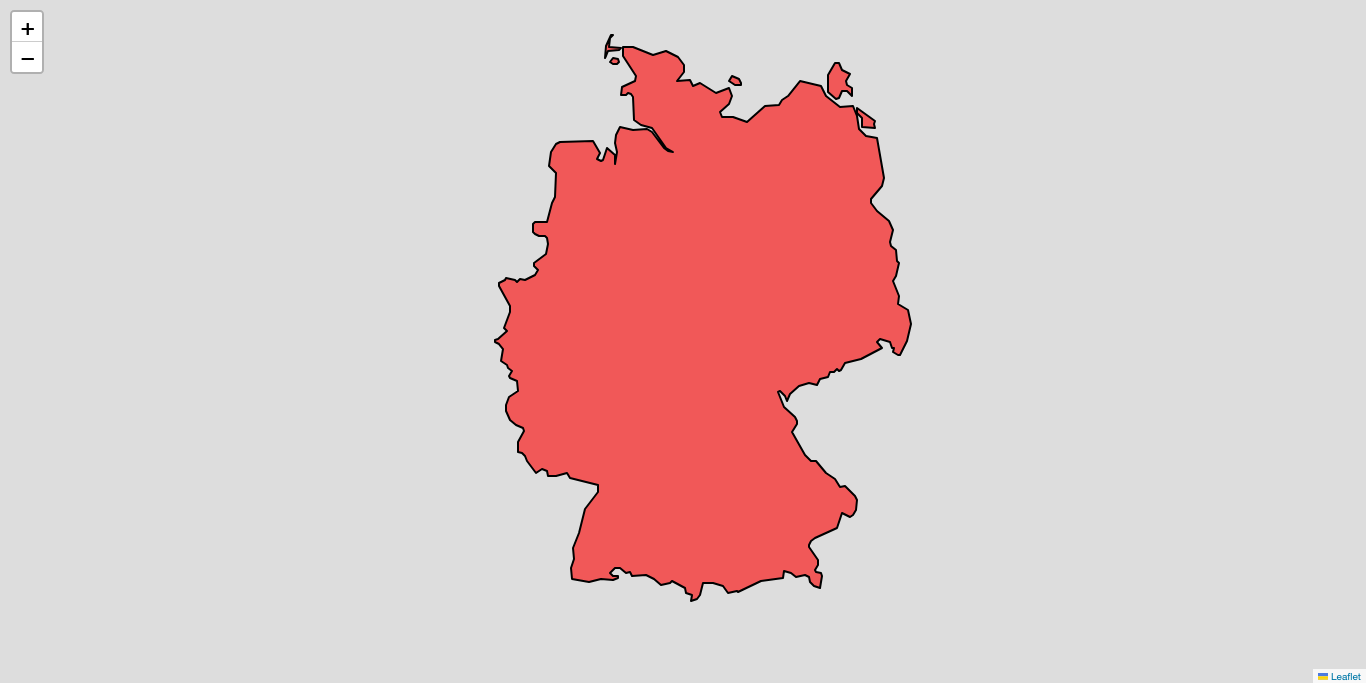

In [5]:
# Get GeoJSON for Germany
germany_gdf = plotter.get_geojson_for_country("DE")

# Create a focused map
germany_map = folium.Map(location=[51, 10], zoom_start=6, tiles=None)

# Add Germany with custom styling
folium.GeoJson(
    germany_gdf,
    style_function=lambda x: {
        "fillColor": "#ff0000",
        "color": "black",
        "weight": 2,
        "fillOpacity": 0.6
    }
).add_to(germany_map)

# Save map as static image and display the image inside this notebook
image_path = os.path.join(export_folder, 'germany_map.png')
img_data = germany_map._to_png(5)
img = PILImage.open(io.BytesIO(img_data))
img.save(image_path)
Image(image_path)

This direct access to country GeoJSON is useful when you need to:

- Perform spatial analysis with country boundaries
- Combine country shapes with other geometries
- Add custom interactive elements to specific countries
- Calculate centroids or other geometric properties for positioning labels or markers

Feel free to combine this module with the map created in any of the previous modules (`mescal_303, mescal_304, mescal_305, mescal_306`) to show neighboring countries in the same map.

## Conclusion
The MapCountryPlotter module is a simple but powerful tool for extending clean, informative geographical visualizations. By providing an easy way to add country shapes to your maps, it helps you to
 a) provide geo shapes for countries;
 b) focus on communicating your data rather than relying on the rather distractive default tile_layers in folium.